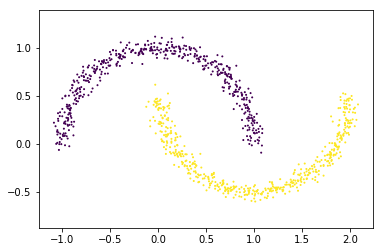

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

n_samples = 1000

#x_org,y = datasets.make_blobs(n_samples=n_samples, random_state=8)
#x_org,y = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
x_org,y = datasets.make_moons(n_samples=n_samples, noise=.05)

xmax, xmin = x_org.max(), x_org.min()

nb_data = len(x_org)
nb_dim = x_org.shape[1]
nb_mix = 10

plt.scatter(x_org[:,0], x_org[:,1], c=y, s=1)
plt.axes().set_aspect('equal', 'datalim')

[# of data,  # of mixture, dimension]

In [2]:
def pdf_gaussian(x, mean, cov):
    shift1 = np.expand_dims((x-mean), -1)
    shift2 = np.expand_dims((x-mean), -2)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    coef = 1. / (np.sqrt(2.*np.pi))**x.shape[-1] / np.sqrt(det)
    return coef * np.exp(-0.5 * (np.matmul(x-mean,inv) * (x-mean)).sum(-1))

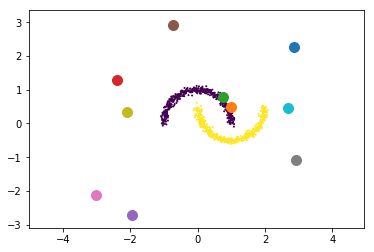

In [3]:
import numpy as np

x = np.reshape(x_org, (nb_data, 1, nb_dim))
mean = np.random.random((1, nb_mix, nb_dim)) * (xmax-xmin)*2. - (xmax-xmin)
cov = np.expand_dims(np.stack([np.eye(nb_dim)] * nb_mix), 0)
pi = np.random.random(nb_mix)
pi = pi / pi.sum()

resp = np.zeros((nb_data,nb_mix,1))
for k,p in enumerate(pi):
    pdf = pdf_gaussian(x[:,0,:], mean[0,k,:], cov[0,k,:,:])
    resp[:,k:k+1,:] += np.expand_dims(np.expand_dims(p * pdf, 1),1)
resp = resp / resp.sum(1, keepdims=True)

plt.scatter(x_org[:,0], x_org[:,1], c=y, s=1)
for m in mean[0]:
    plt.scatter(m[0], m[1], s=100)
plt.axes().set_aspect('equal', 'datalim')

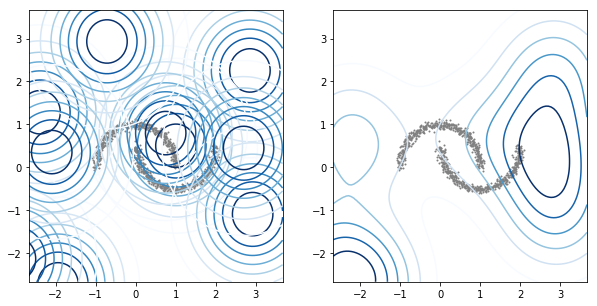

In [4]:
plt.figure(figsize=(10,5))

xv, yv = np.meshgrid(np.linspace(xmin-(xmax-xmin)*0.5,xmax+(xmax-xmin)*0.5,100), np.linspace(xmin-(xmax-xmin)*0.5,xmax+(xmax-xmin)*0.5,100))
samples = np.stack([xv,yv]).transpose(1,2,0).reshape(100*100,2)

plt.subplot(1,2,1)
plt.scatter(x_org[:,0], x_org[:,1], c='gray', s=1)
for k in range(nb_mix):
    pdf = pdf_gaussian(np.expand_dims(samples,1), mean[0,k,:], cov[0,k,:,:])
    plt.contour(xv, yv, pdf.reshape((100,100)), cmap='Blues')

pdf = 0.
for k in range(nb_mix):
    pdf += pi[k]*pdf_gaussian(np.expand_dims(samples,1), mean[0,k,:], cov[0,k,:,:])

plt.subplot(1,2,2)
plt.scatter(x_org[:,0], x_org[:,1], c='gray', s=1)
plt.contour(xv, yv, pdf.reshape((100,100)), cmap='Blues')

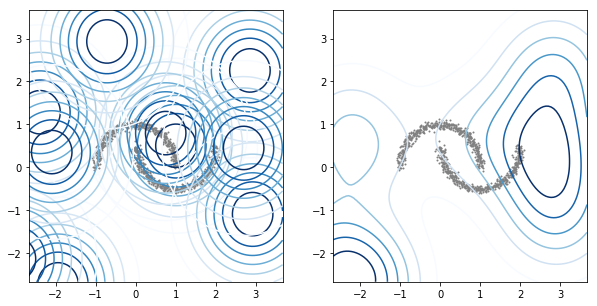

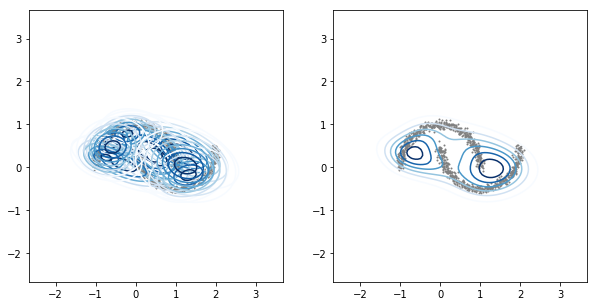

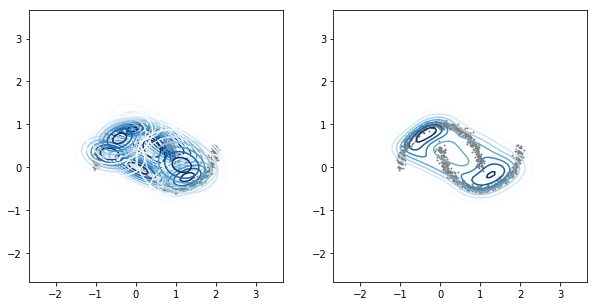

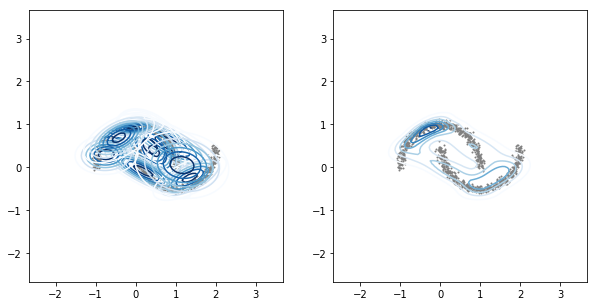

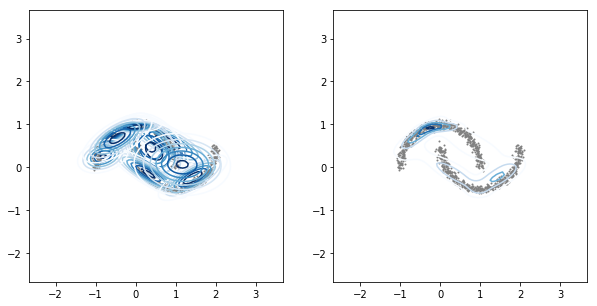

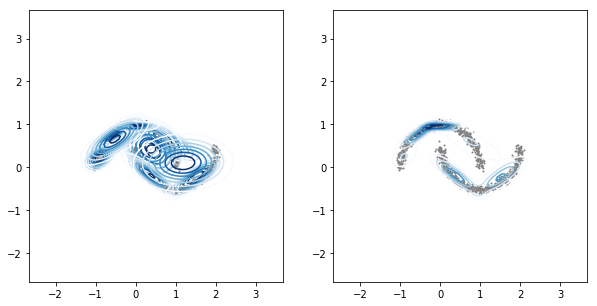

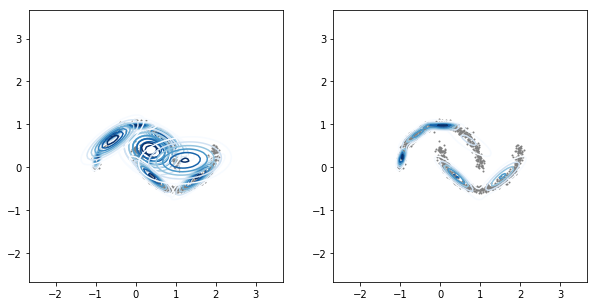

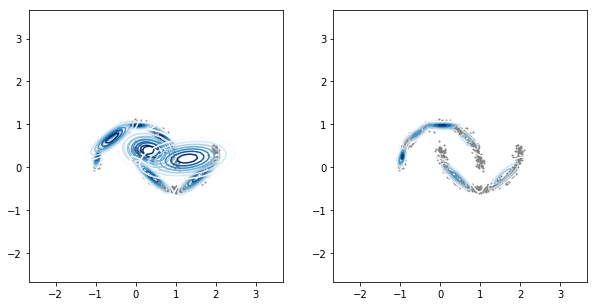

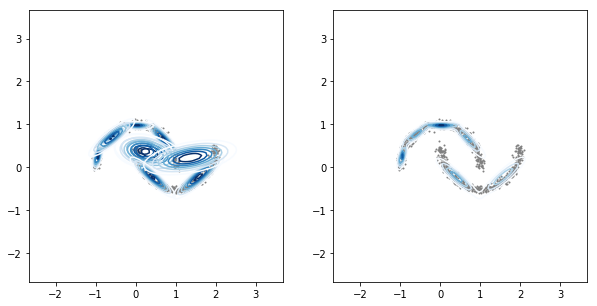

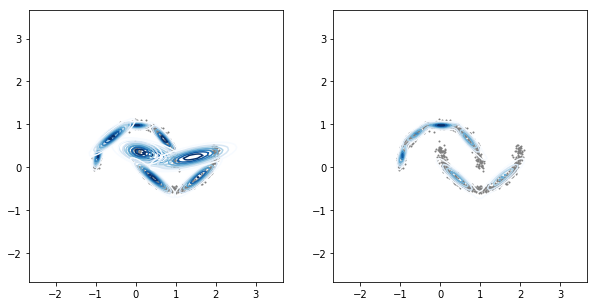

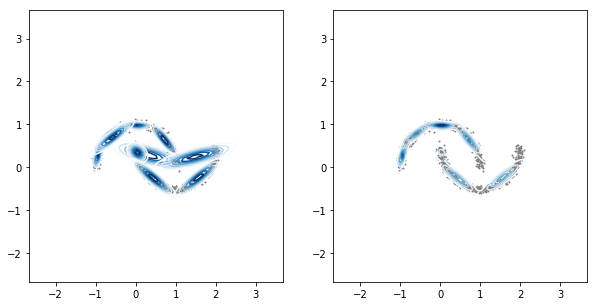

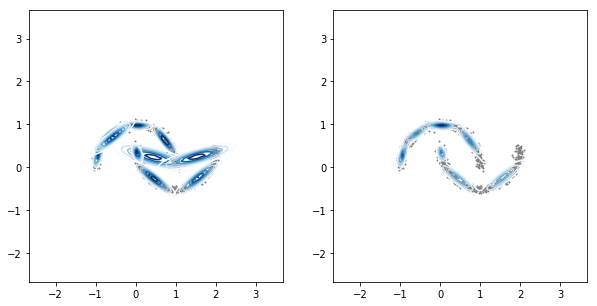

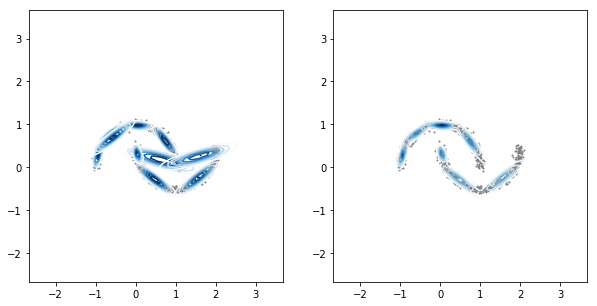

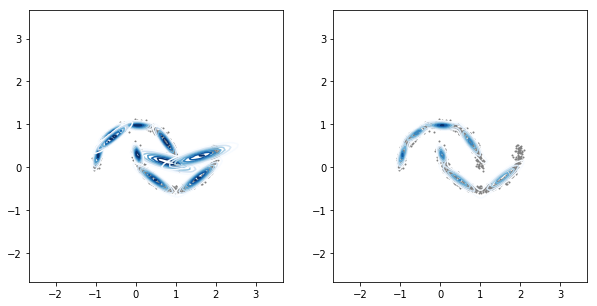

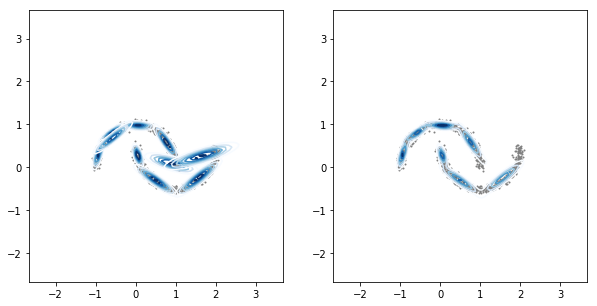

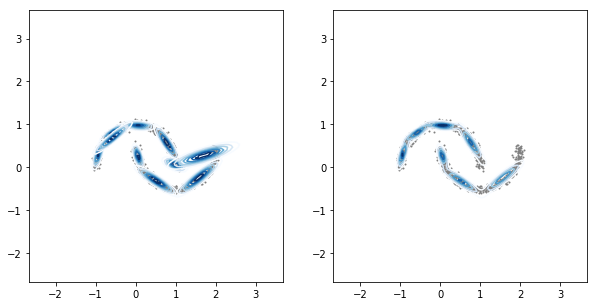

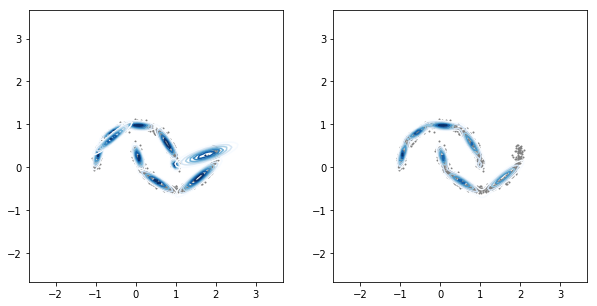

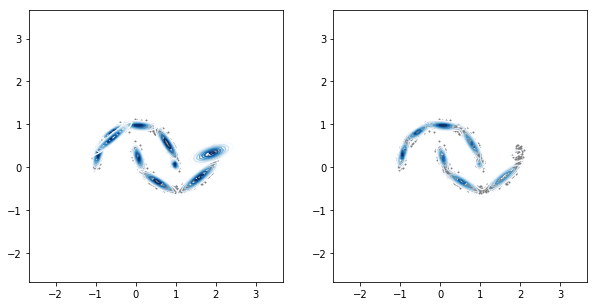

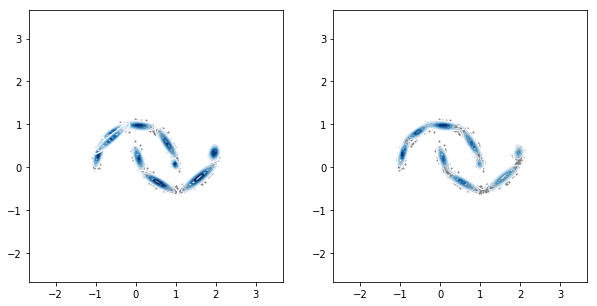

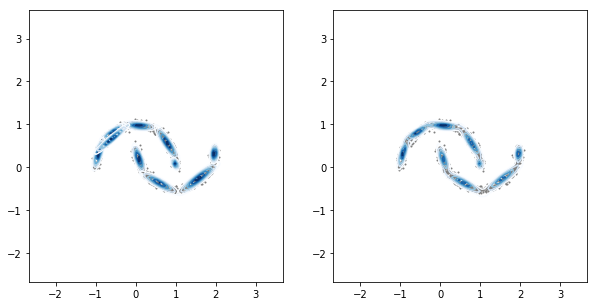

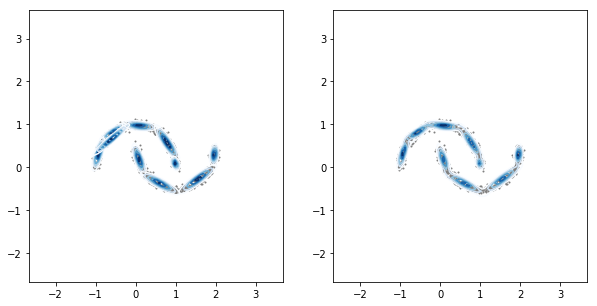

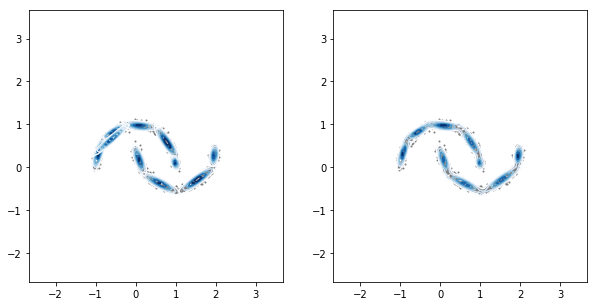

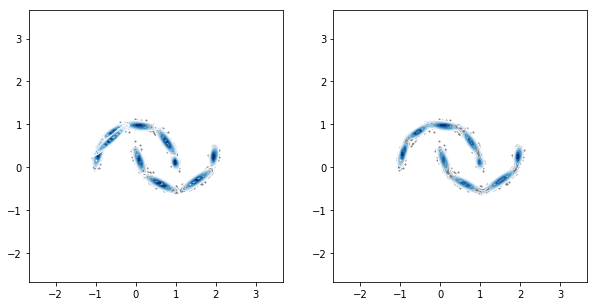

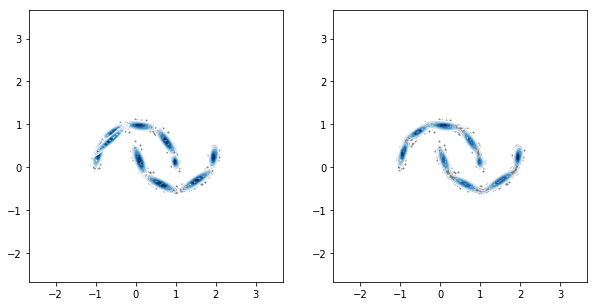

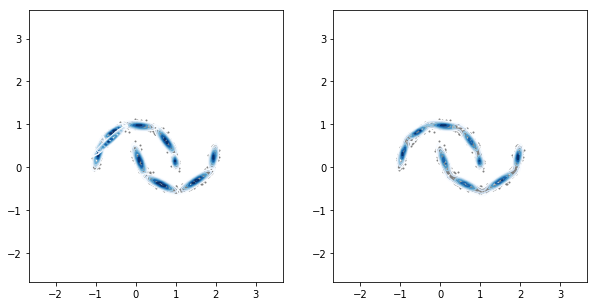

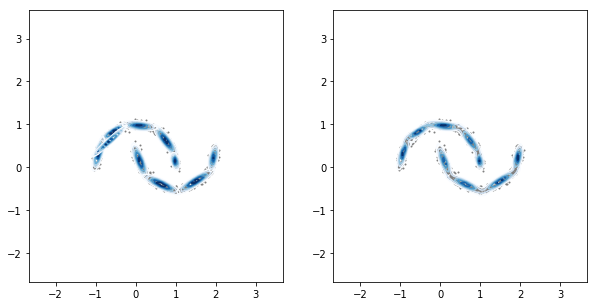

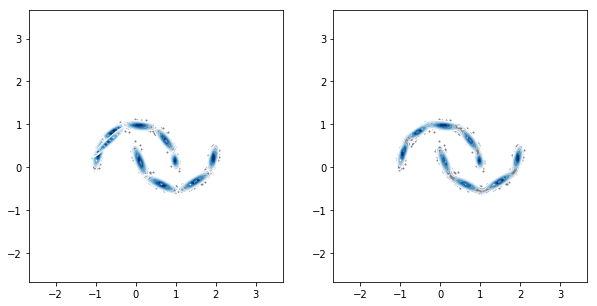

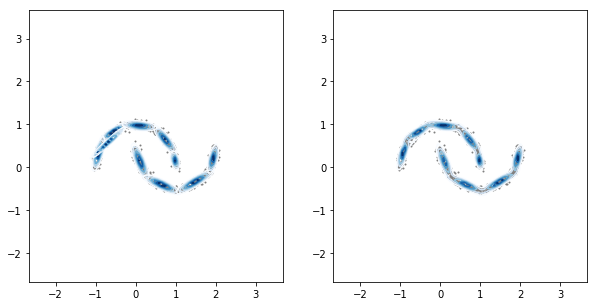

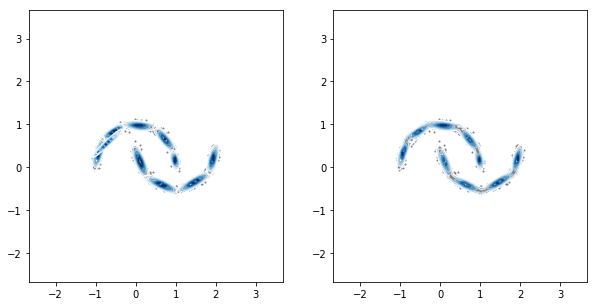

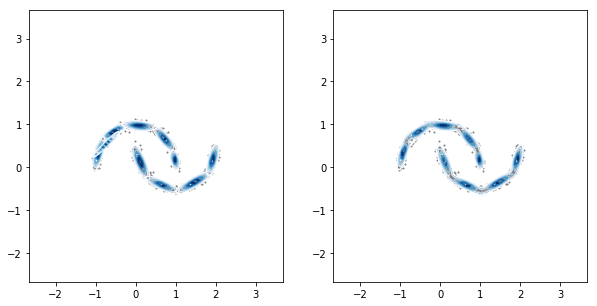

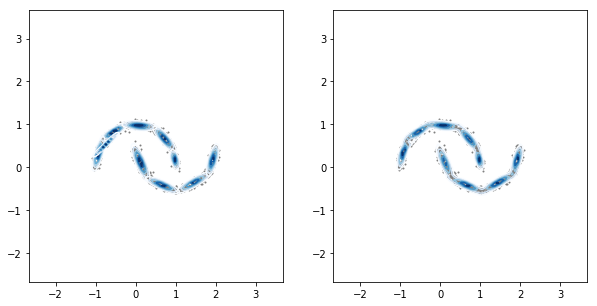

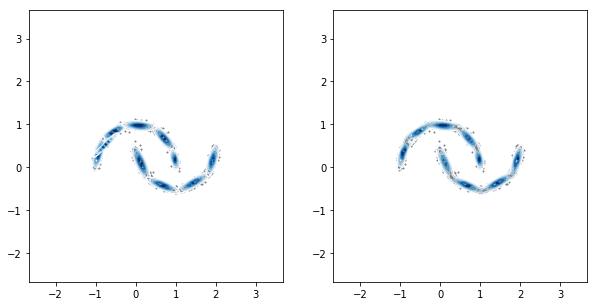

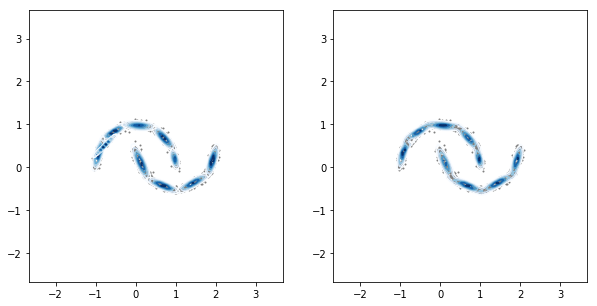

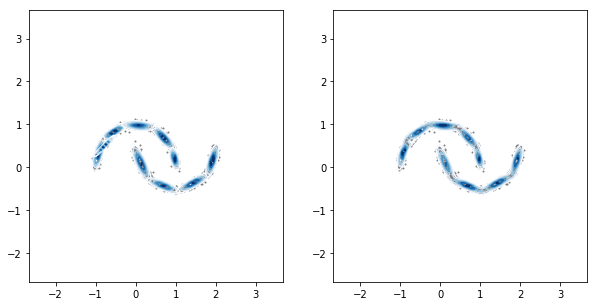

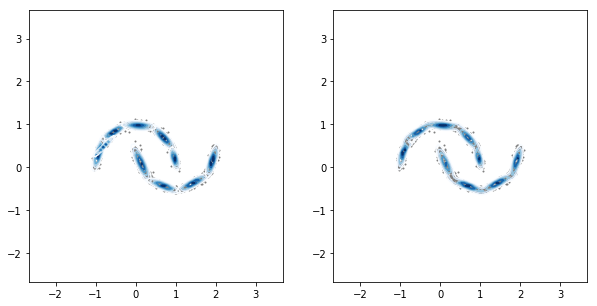

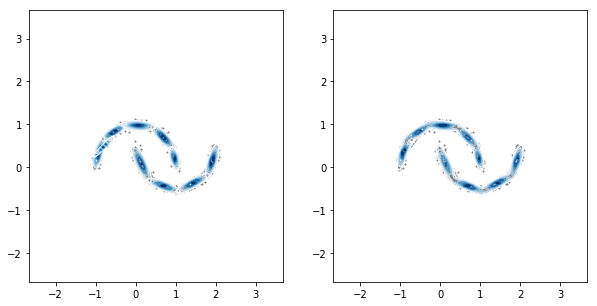

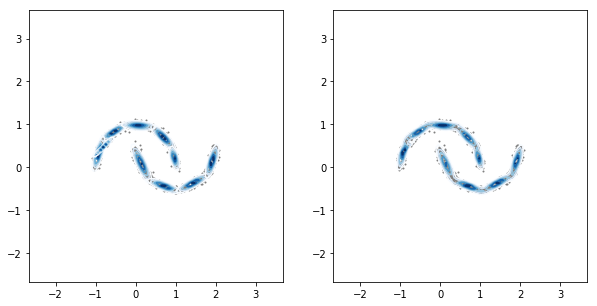

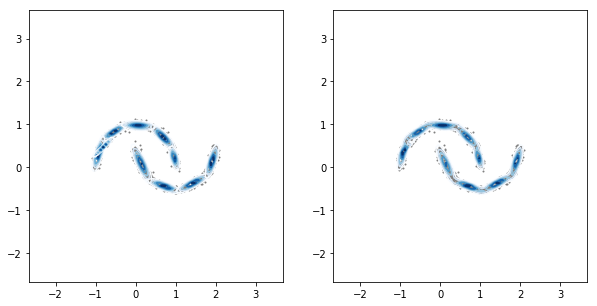

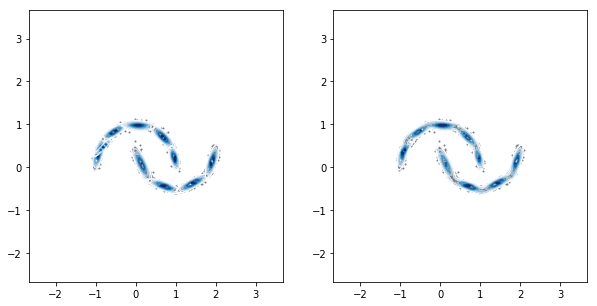

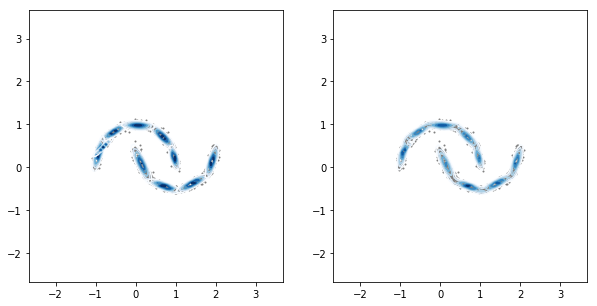

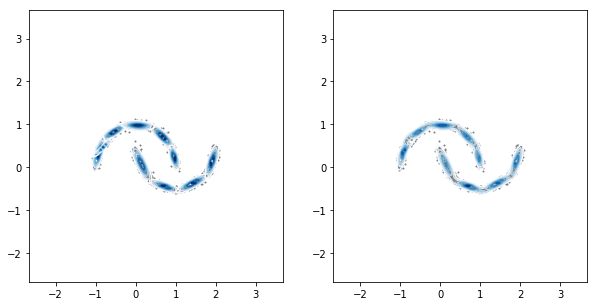

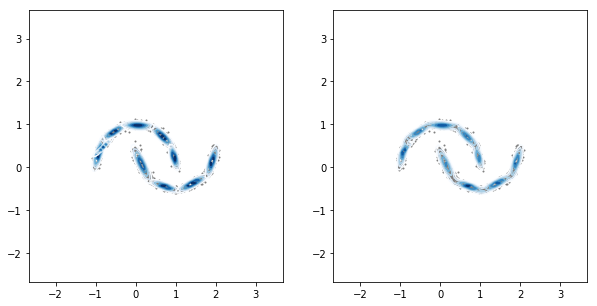

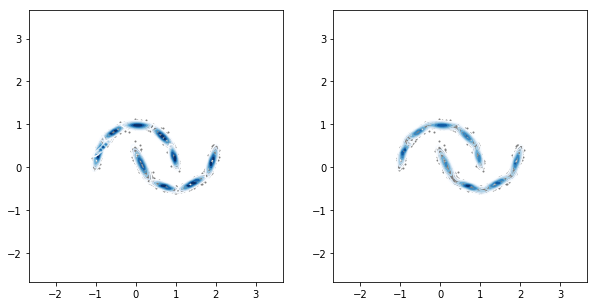

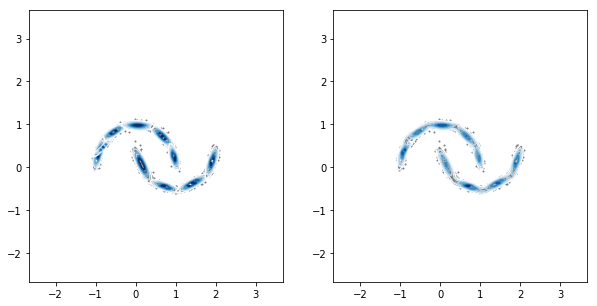

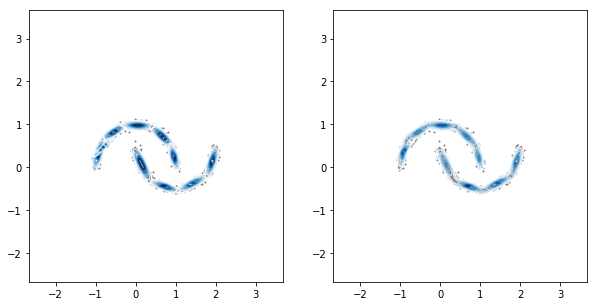

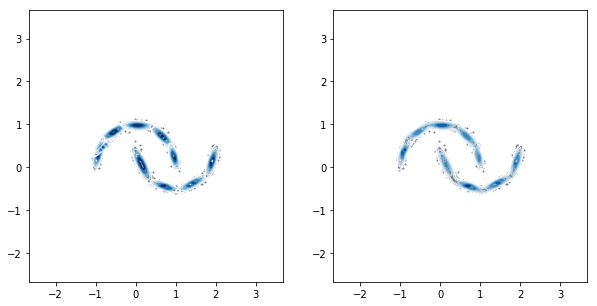

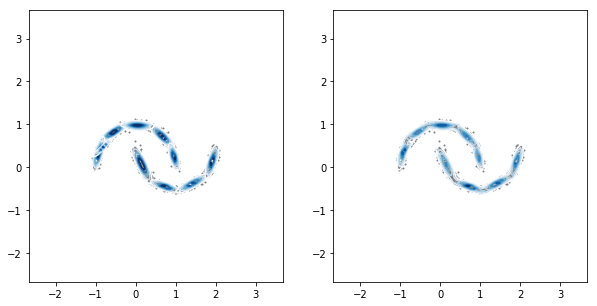

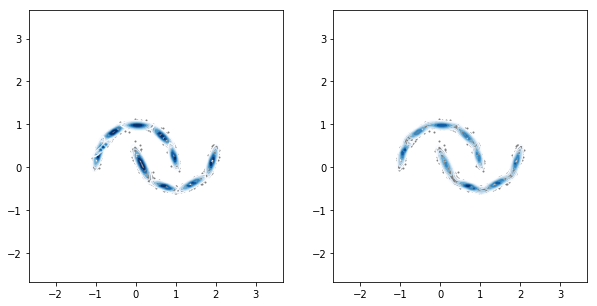

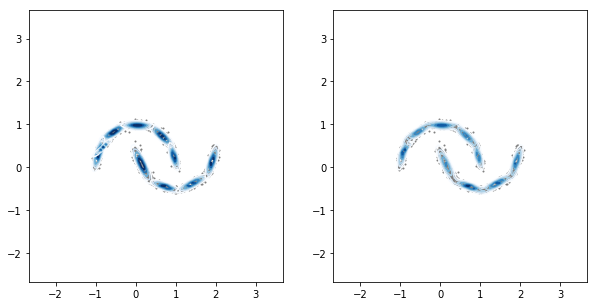

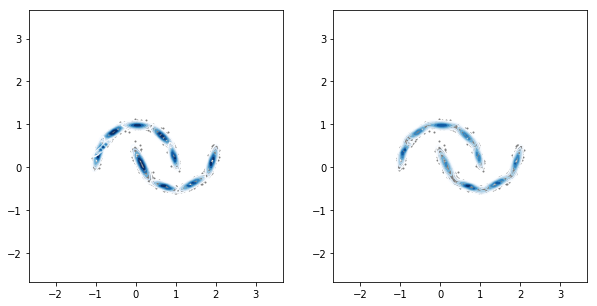

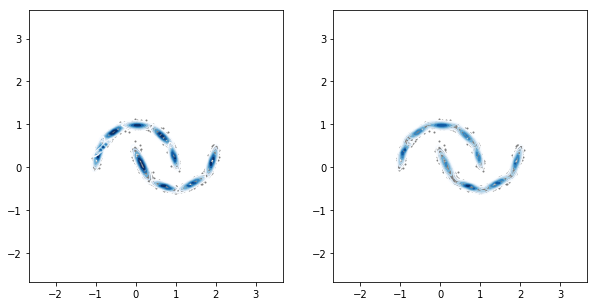

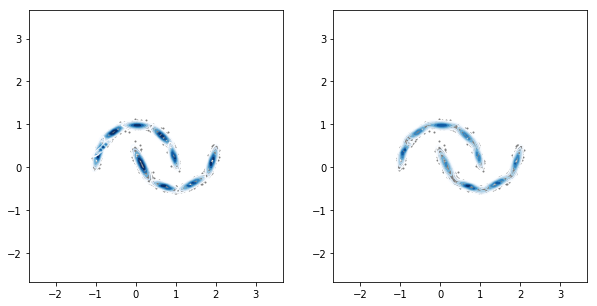

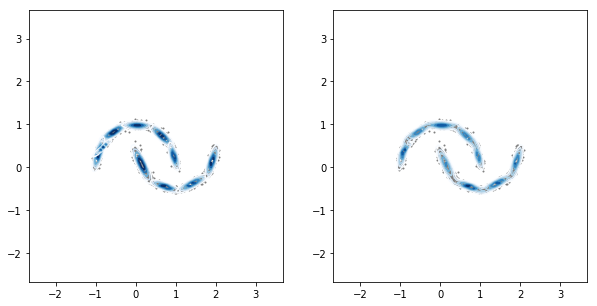

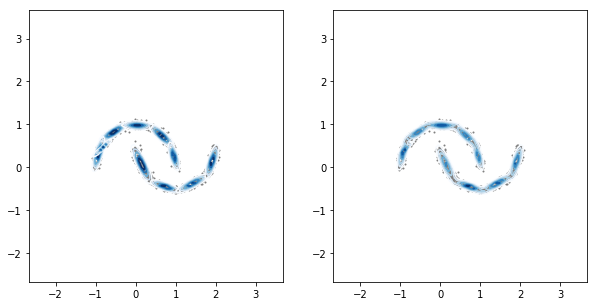

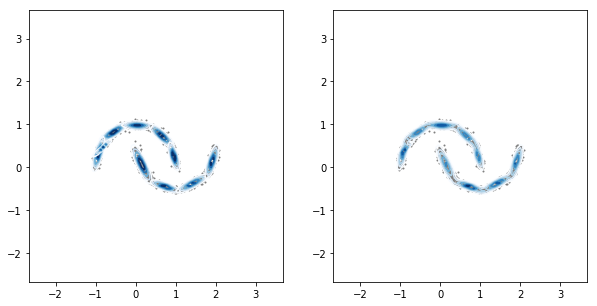

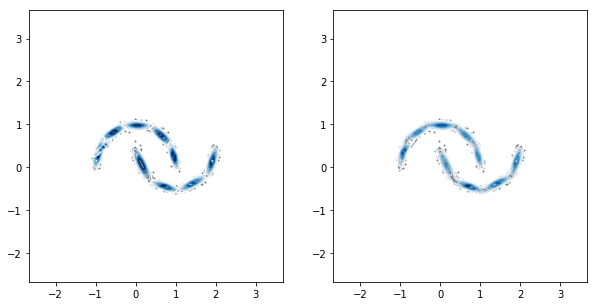

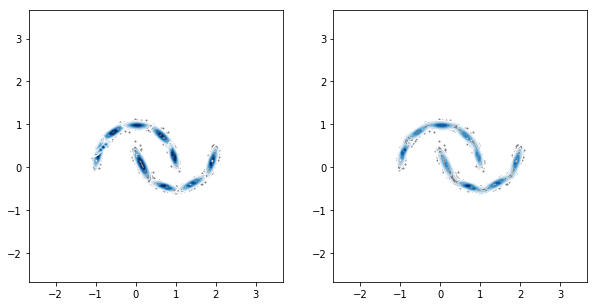

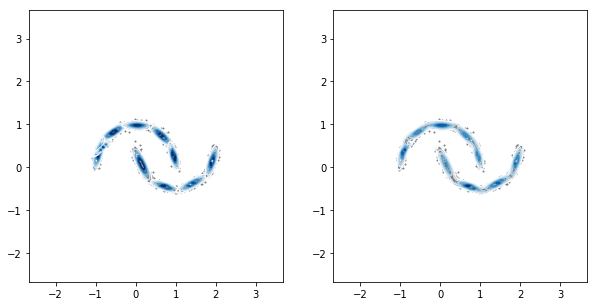

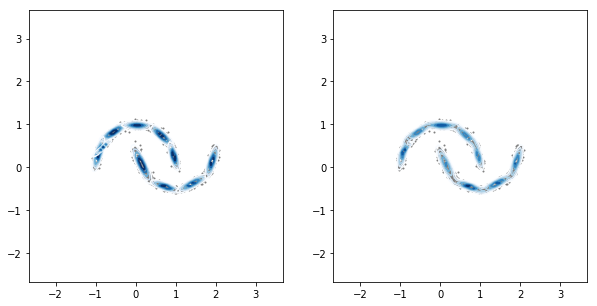

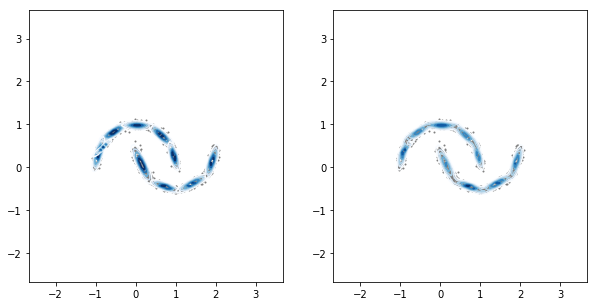

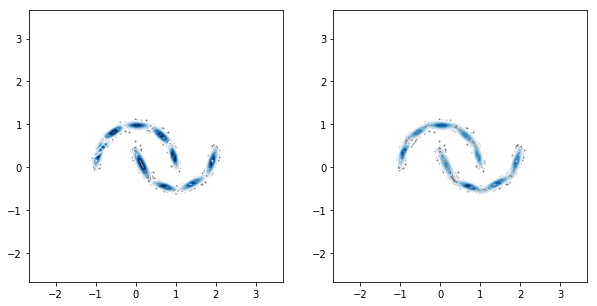

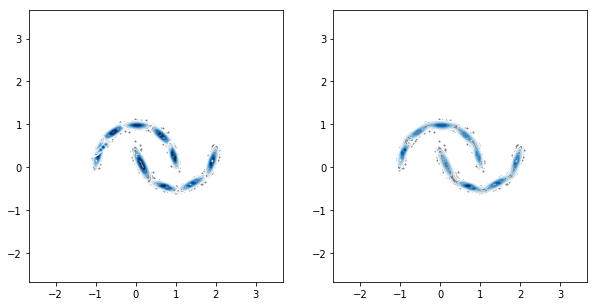

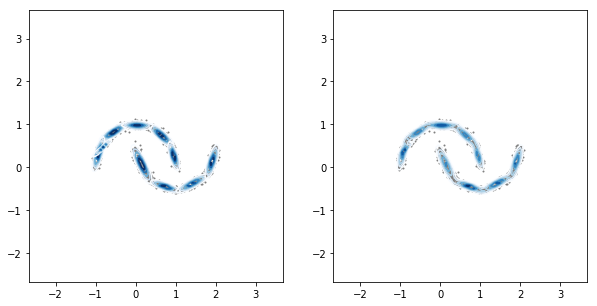

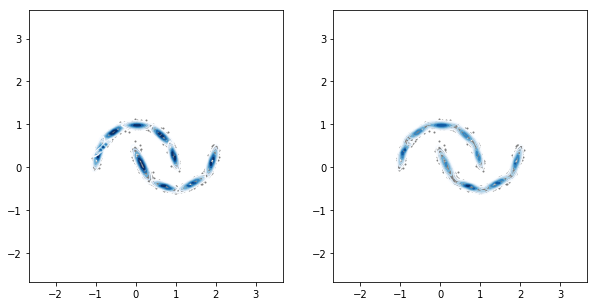

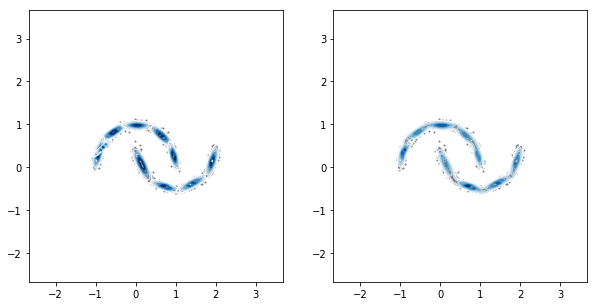

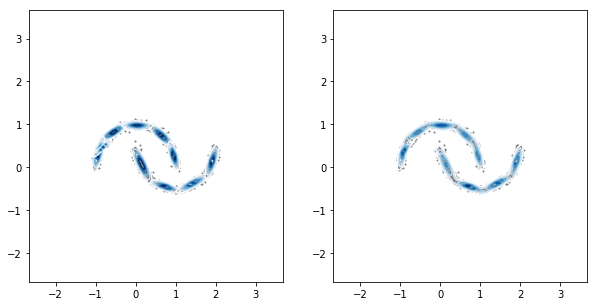

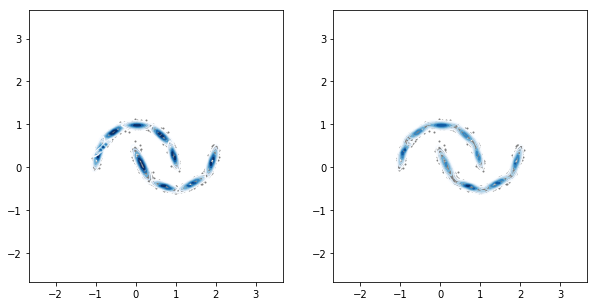

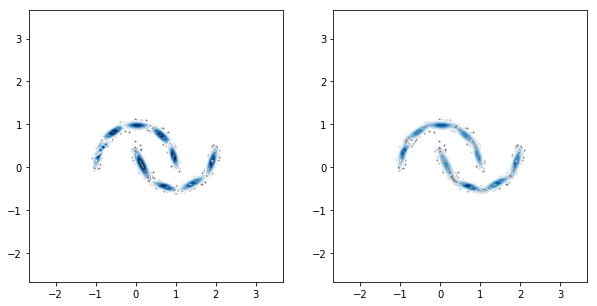

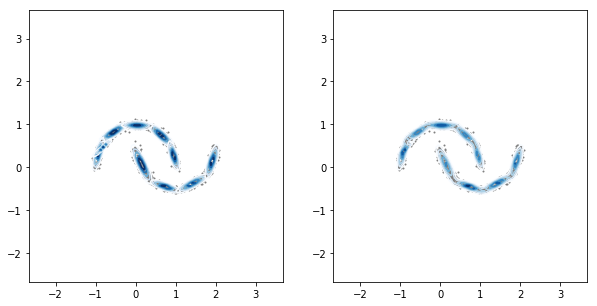

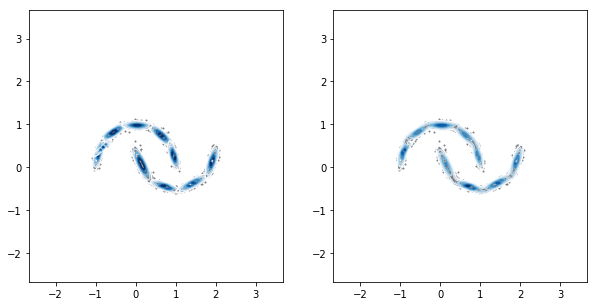

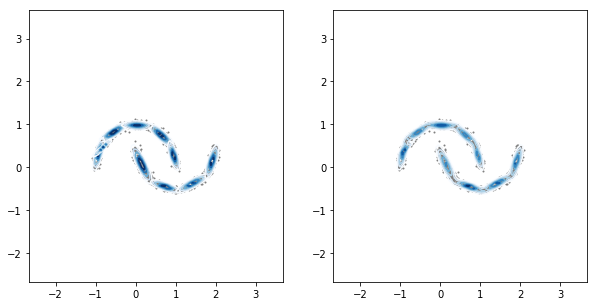

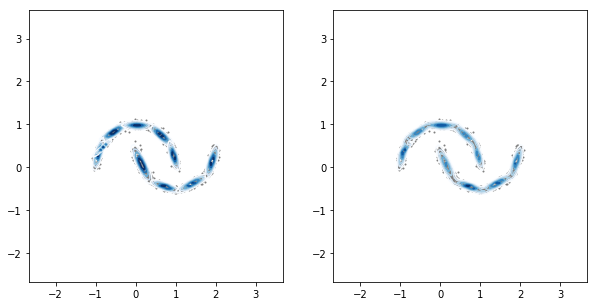

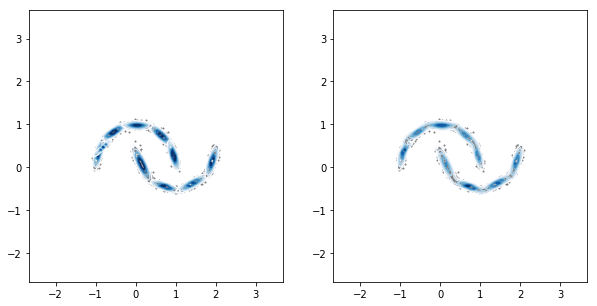

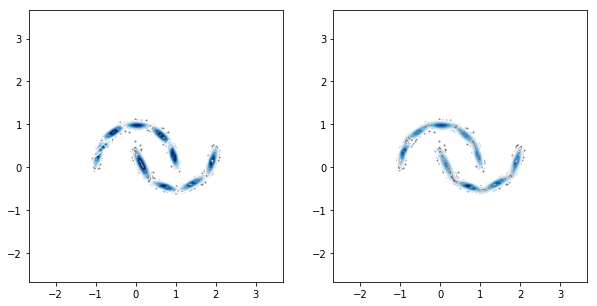

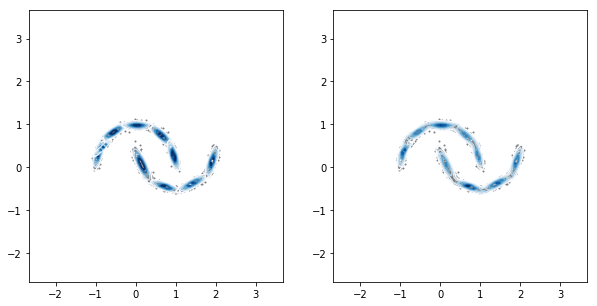

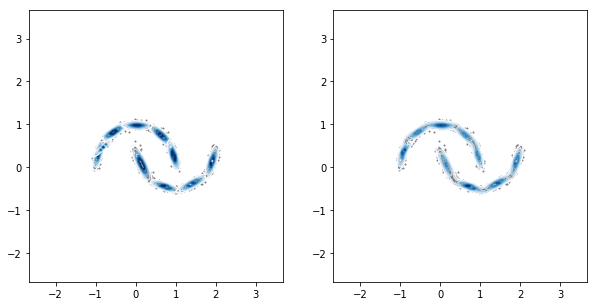

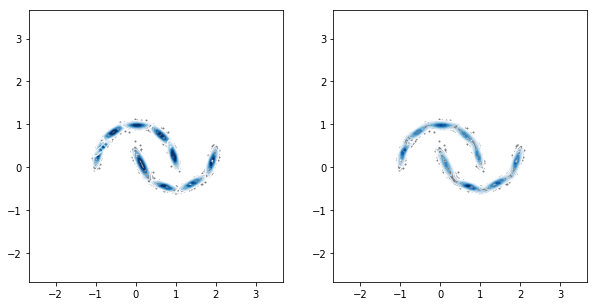

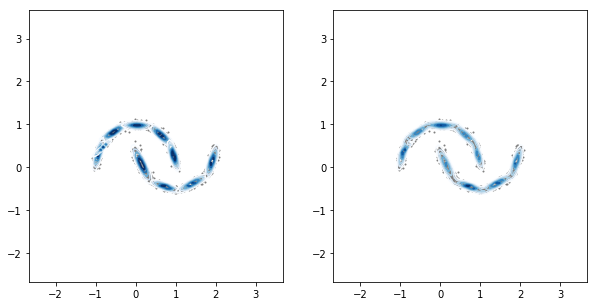

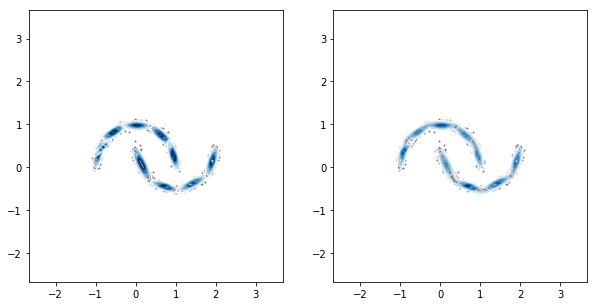

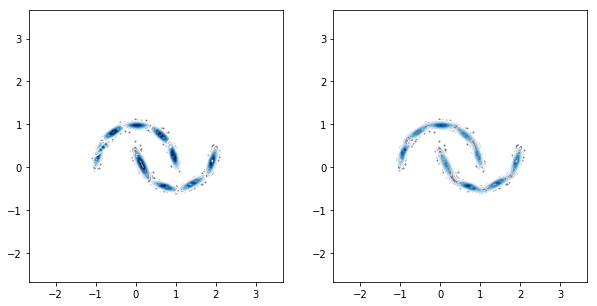

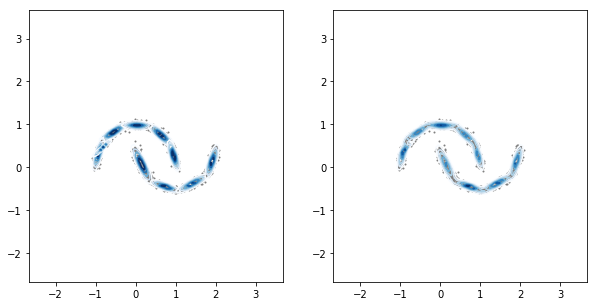

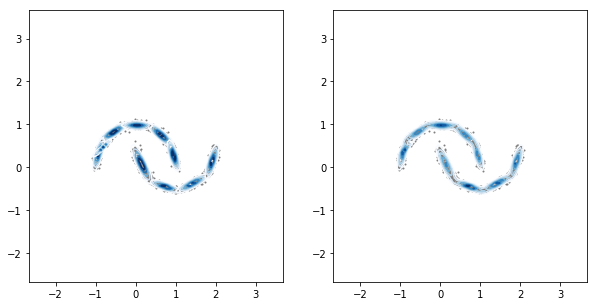

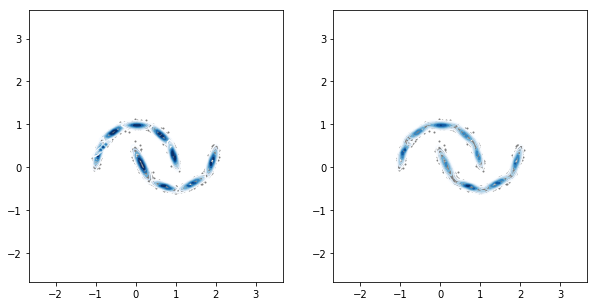

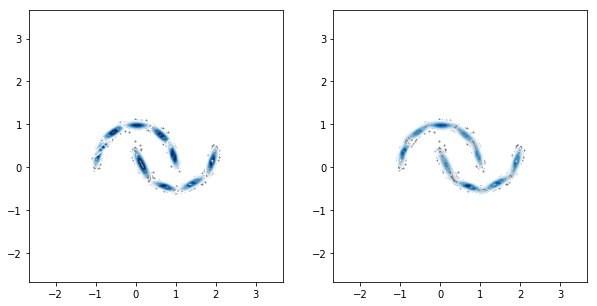

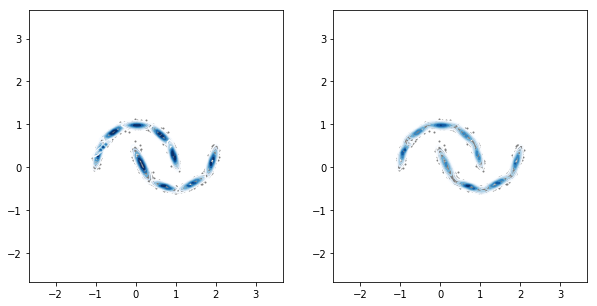

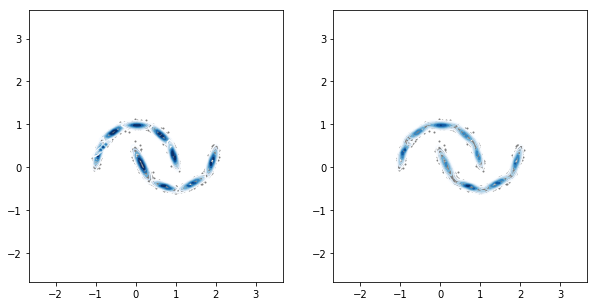

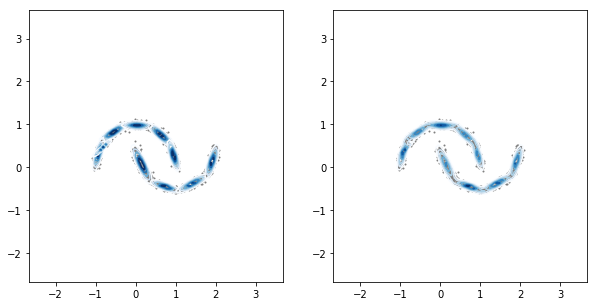

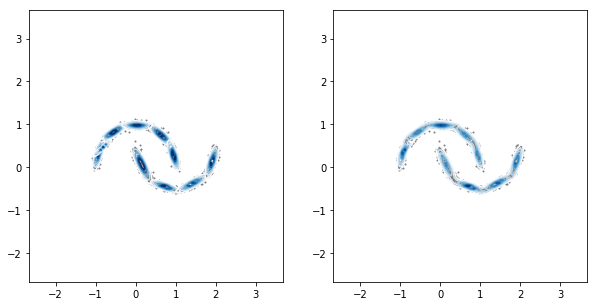

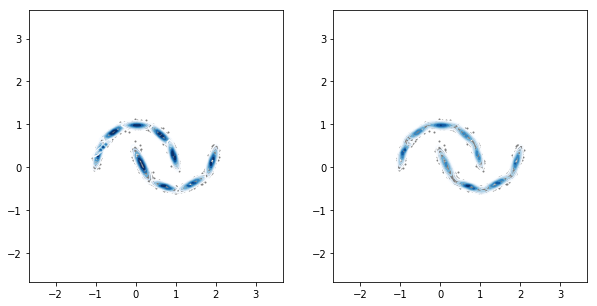

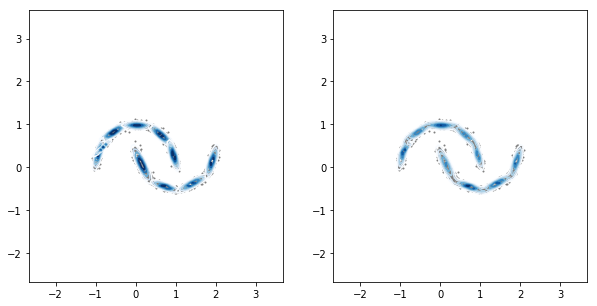

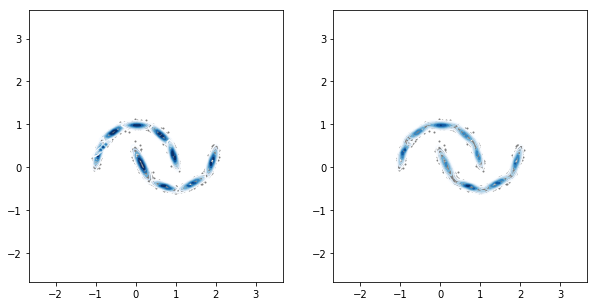

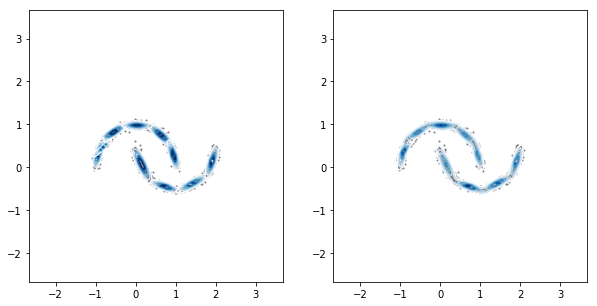

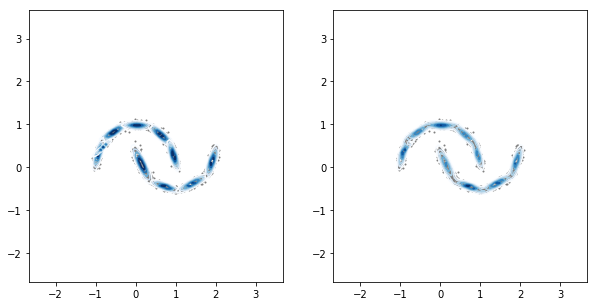

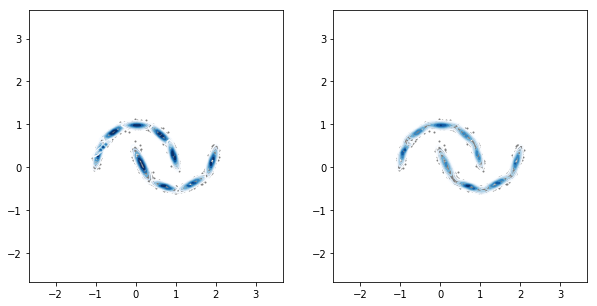

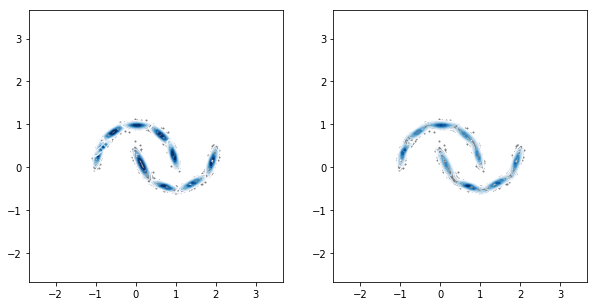

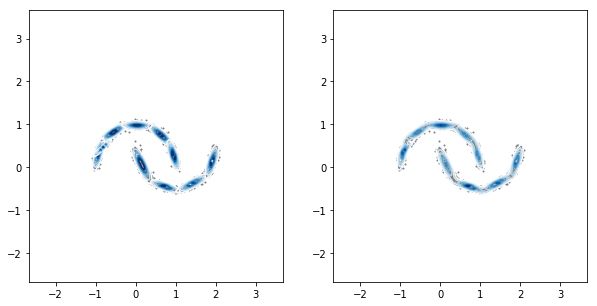

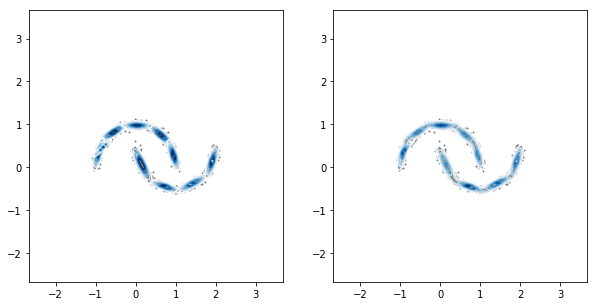

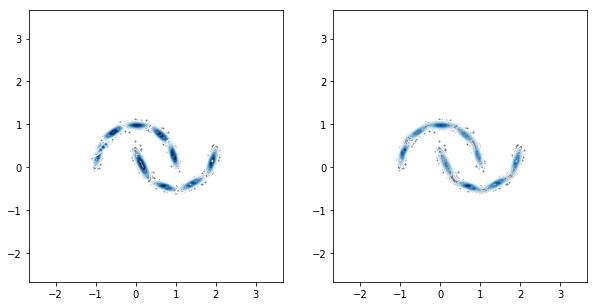

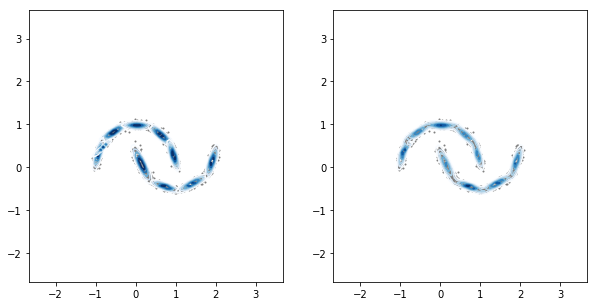

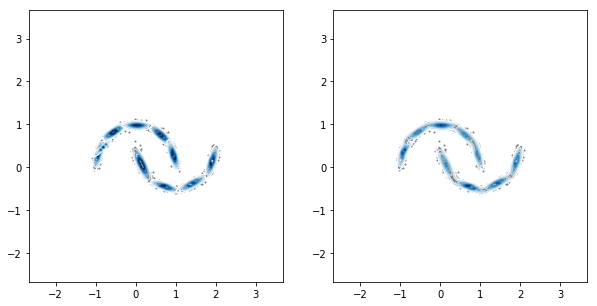

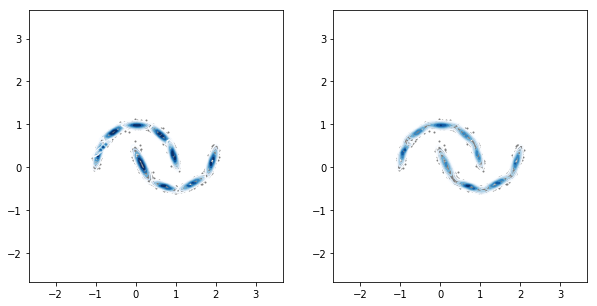

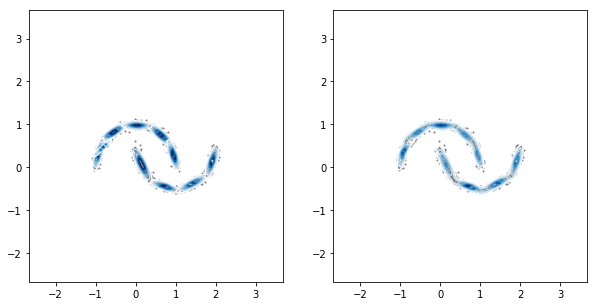

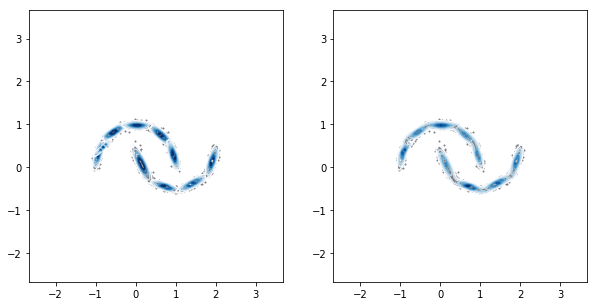

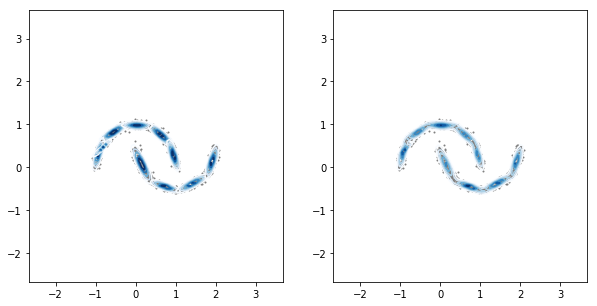

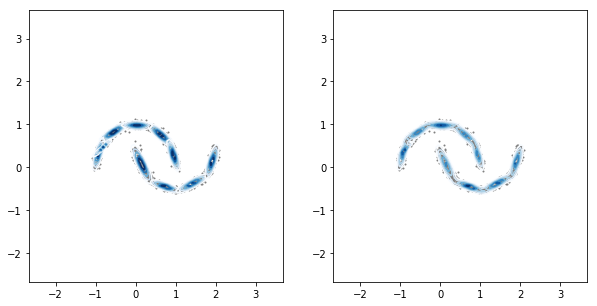

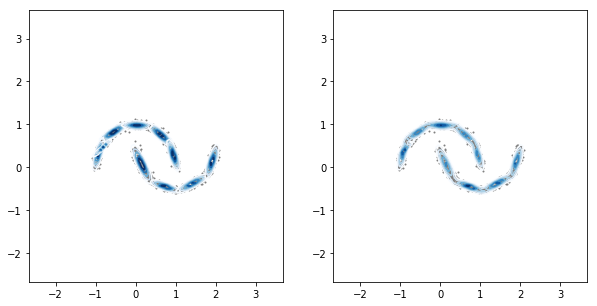

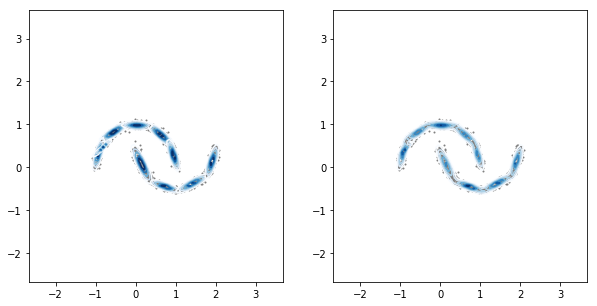

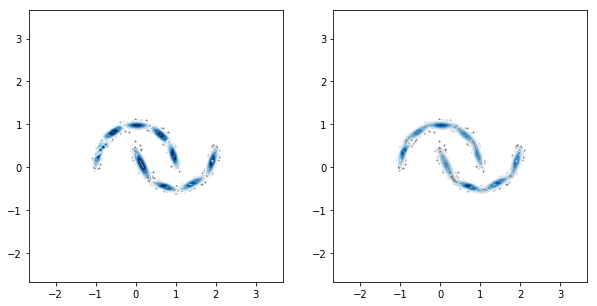

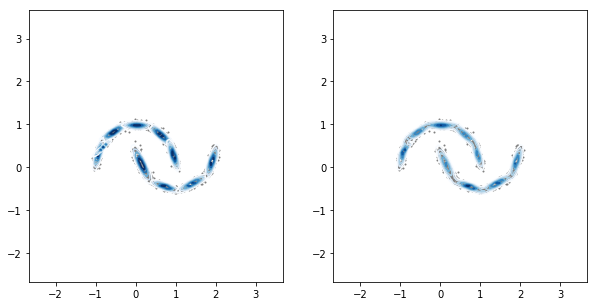

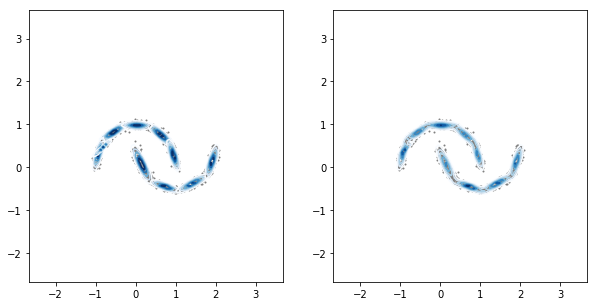

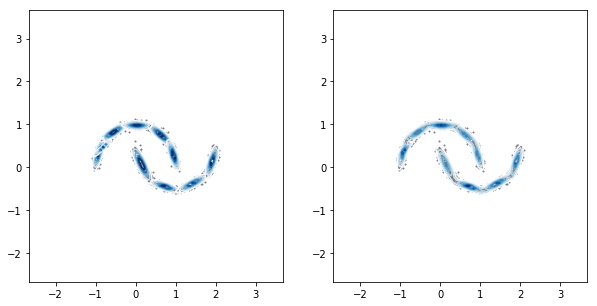

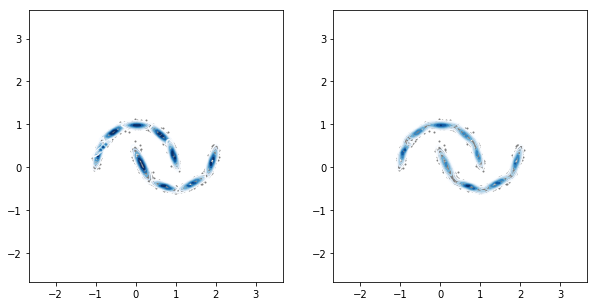

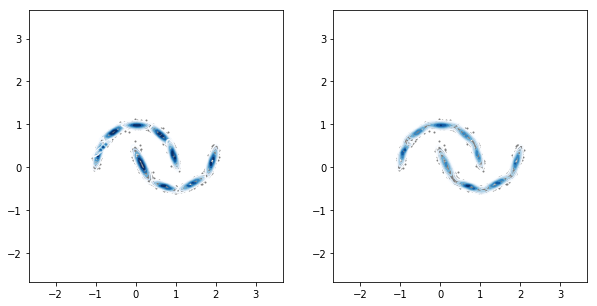

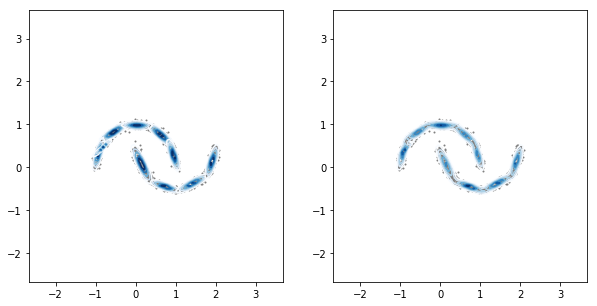

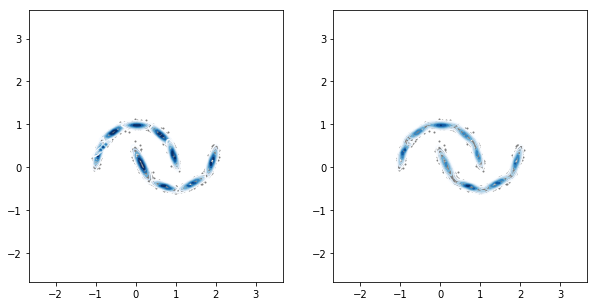

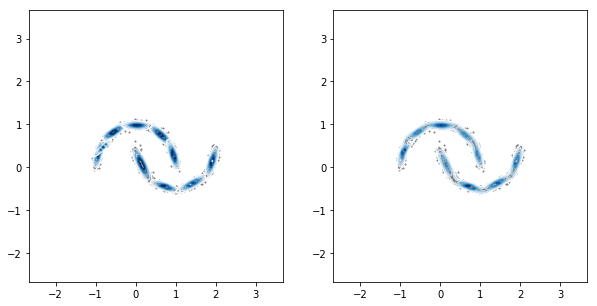

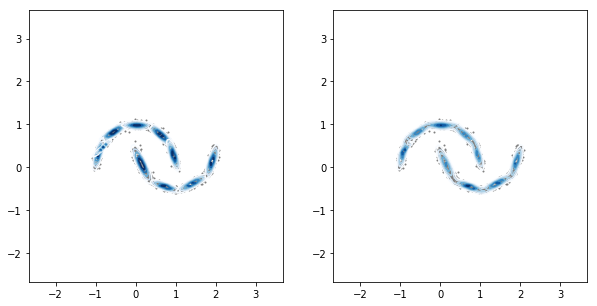

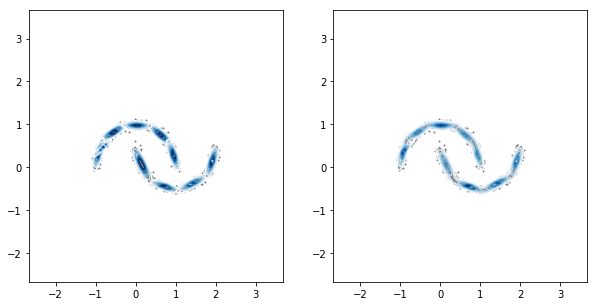

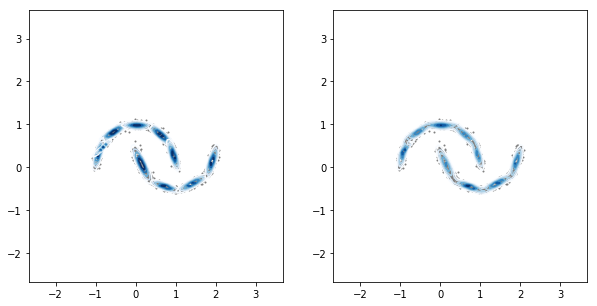

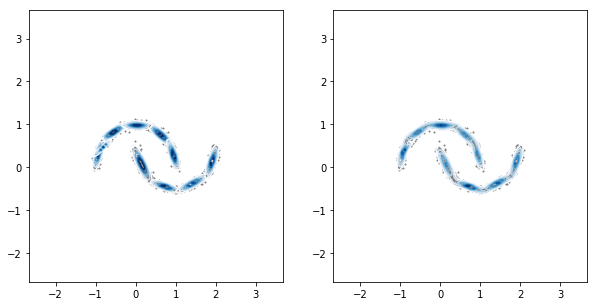

KeyboardInterrupt: 

In [5]:
for epoch in range(1000):
    if True:
        plt.figure(figsize=(10,5))
        
        xv, yv = np.meshgrid(np.linspace(xmin-(xmax-xmin)*0.5,xmax+(xmax-xmin)*0.5,100), np.linspace(xmin-(xmax-xmin)*0.5,xmax+(xmax-xmin)*0.5,100))
        samples = np.stack([xv,yv]).transpose(1,2,0).reshape(100*100,2)
        
        plt.subplot(1,2,1)
        plt.scatter(x_org[:,0], x_org[:,1], c='gray', s=1)
        for k in range(nb_mix):
            pdf = pdf_gaussian(np.expand_dims(samples,1), mean[0,k,:], cov[0,k,:,:])
            plt.contour(xv, yv, pdf.reshape((100,100)), cmap='Blues')
#        plt.axes().set_aspect('equal', 'datalim')
        
        pdf = 0.
        for k in range(nb_mix):
            pdf += pi[k]*pdf_gaussian(np.expand_dims(samples,1), mean[0,k,:], cov[0,k,:,:])
    
        plt.subplot(1,2,2)
        plt.scatter(x_org[:,0], x_org[:,1], c='gray', s=1)
        plt.contour(xv, yv, pdf.reshape((100,100)), cmap='Blues')
#        plt.axes().set_aspect('equal', 'datalim')
        plt.savefig('gmm.moon.'+str(epoch).zfill(4)+'.png', bbox_inches='tight', transparent=False)
            
        plt.show()
        
    mean = (resp * x).sum(0, keepdims=True) / resp.sum(0, keepdims=True)
    cov = (np.expand_dims(resp, -1) * np.expand_dims((x-mean), -1) * np.expand_dims((x-mean), -2)).sum(0, keepdims=True) / np.expand_dims(resp, -1).sum(0, keepdims=True)

    resp = np.zeros((nb_data,nb_mix,1))
    for k,p in enumerate(pi):
        pdf = pdf_gaussian(x, mean[0,k,:], cov[0,k,:,:])
        resp[:,k:k+1,:] += np.expand_dims(p * pdf, 1)
    resp += np.finfo(np.float32).eps
    resp = resp / resp.sum(1, keepdims=True)
    pi = resp.sum(0) / float(nb_data)
            
    if False:
        plt.scatter(x_org[:,0], x_org[:,1], c=y, s=1)
        for m in mean[0]:
            plt.scatter(m[0], m[1], s=100)
        plt.show()